<a href="https://colab.research.google.com/github/codestates/ds-cs-section1-sprint2/blob/master/n123-confidence-intervals/n123-confidence-intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

---

# Confidence Intervals

## 🏆 학습 목표 

- CLT의 의미에 대해서 설명 할 수 있다.
- 신뢰구간의 목적과 사용 예시에 대해 설명 할 수 있다.
- 추정된 통계치에 대해서 신뢰구간을 계산 할 수 있다.
- 신뢰구간에 대한 표본 오차를 설명하고 이를 시각화 할 수 있다. 

---



## Many Samples



### 큰 수의 법칙 ( Law of large numbers )

sample 데이터의 수가 커질 수록, sample의 통계치는 점점 모집단의 모수와 같아진다. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

population = np.random.normal(50, 10, 1000) # mu = 50, sd = 10, 
population.var()

99.23849868055098

In [11]:
np.random.choice(population, 5).var()

22.83484693452305

In [12]:
np.random.choice(population, 15).var()

70.05663658358472

In [13]:
np.random.choice(population, 50).var()

64.33330032251185

In [14]:
np.random.choice(population, 100).var()

99.72290312454719

In [15]:
np.random.choice(population, 200).var()


98.15707986626687

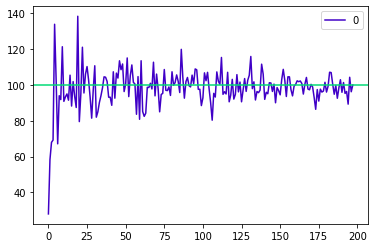

In [28]:
dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(population, i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = 100, color = '#00da75')
 );

- method chaining 에 대해서 공부해보세요.

### 중심극한정리 ( Central Limit Theorem, CLT )

Sample 데이터의 수가 많아질 수록, **sample의 평균**은 정규분포에 근사한 형태로 나타난다.

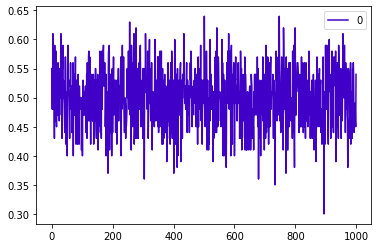

In [34]:
sample_means = []

for x in range(0, 1000):
  coinflips = np.random.binomial(n = 1, p = 0.5, size = 100) # binomial distribution
  sample_means.append(coinflips.mean())

pd.DataFrame(sample_means).plot(color = '#4000c7');

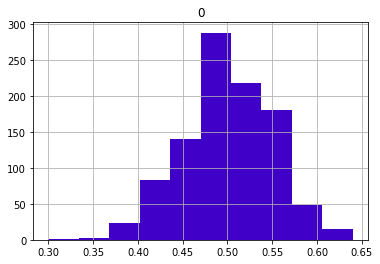

In [35]:
pd.DataFrame(sample_means).hist(color = '#4000c7');

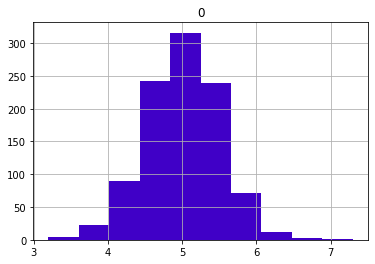

In [36]:
sample_means2 = []

for x in range(0,1000):
  one_poiss = np.random.poisson(5, 20) # Poisson 분포 데이터
  sample_means2.append(one_poiss.mean())

pd.DataFrame(sample_means2).hist(color = '#4000c7');

In [ ]:
# normal distribution에 대해서도 실행해보세요.

sampling을 몇번 하느냐도 중요하지만, sampling을 얼마나 하느냐도 다릅니다.


In [ ]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

# b(n, p)
# N(0,1) ~ N(u, sd)

for x in range(0, 3000):
  coinflips_small = np.random.binomial(n = 1, p = .5, size = 10)
  coinflips_medium = np.random.binomial(n = 1, p = .5, size = 50)
  coinflips_large = np.random.binomial(n = 1, p = .5, size = 200)
  sample_means_small.append(coinflips_small.mean())
  sample_means_medium.append(coinflips_medium.mean())
  sample_means_large.append(coinflips_large.mean())

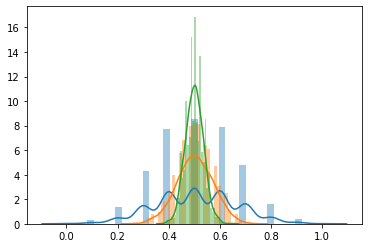

In [ ]:
import seaborn as sns
ax = plt.subplots()
for sample in [sample_means_small, sample_means_medium, sample_means_large]: 
  sns.distplot(sample)

# sample_means_small -> blue line 
# sample_means_medium -> orange line
# sample_means_large -> green line

## 평균의 표준 오차

평균의 표준 오차란, 표본 평균의 분포에 대한 표준 편차입니다. 

<img src='https://i.imgur.com/WuJp6ks.png'>

sample 을 어떻게 뽑느냐에 따라서 sample의 평균의 분포는 다를겁니다.

## Point estimate VS Interval estimate

ex) 1000명의 회사원의 평균 연봉.

3000만원일 것이다.

2500 ~ 3500만원 정도 할 것이다.

1000 ~ 5000만원 정도 할 것이다.

0 ~ 100000만원 정도 할 것이다. 

--- 

예측 하는 구간이 **넓어질 수록** 맞을 확률(`신뢰도`)은 올라감. 




## 신뢰도 

신뢰도가 95% 라는 의미는 표본을 100번 뽑았을때 95번은 신뢰구간 내에 모집단의 평균이 포함된다.

앞에 예시를 다시 한번 읽어보고 윗 문장의 의미를 생각해보시길 바랍니다.



## 신뢰 구간의 설정 및 해석

<img src='https://i.imgur.com/dbhRomh.png' width = 550> 

이 구간을 수학적으로 표현한 내용이 아래의 식과 같으며

$ \bar {x} \pm {t \cdot {s \over \sqrt{n} } }$

<br>

$ \bar {x} $ 를 `estimated mean`.

$ {t \cdot {s \over \sqrt{n} } }$ 를 `error`라 부릅니다.



In [38]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용합니다. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

# cdf -> t 를 넣으면 %
# ppf -> % 를 넣으면 t

# 1 + 0.95 / 2 -> 0.975
# (1 - 0.95) / 2 -> 0.025

confidence_interval([1,2,3,1,2,3,1,2,3])

# 표본 집단의 평균은 2.0이며, 모집단의 평균은 신뢰도 95%로 1.33 ~ 2.66사이에 존재

(2.0, 1.3343139459430469, 2.665686054056953)

## 신뢰구간의 시각화


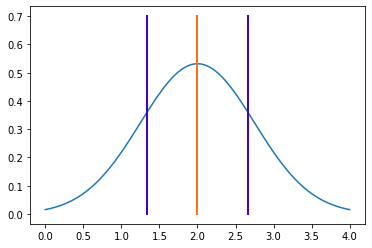

In [42]:
x = np.linspace(0, 4, 101) # 0 ~ 4 by 100 

y = stats.norm(2, 0.75).pdf(x) # probability density function with N(2, 0.75)

# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html 참조

# (2.666, 0) ----> (2.666, 0.7) 까지의 Line

plt.plot(x, y) # blue line

plt.plot([2, 2], [0, 0.7], 'k-', lw = 2, color = '#ff6f15') 

plt.plot([1.334,1.334], [0,0.7], 'k-', lw = 2, color = '#4000c7')
plt.plot([2.666,2.666], [0,0.7], 'k-', lw = 2, color = '#4000c7');

# '--' : dashed

## 신뢰구간과 T-test의 관계

신뢰구간 = 시행한 가설검정이 통계적 의미를 갖는 범위

모집단의 평균이 표본평균으로 부터 계산된 신뢰구간 안에 들어가는 경우, 귀무가설을 **기각하지 않습니다**.

반대로, 모집단의 평균이 표본평균으로 부터 계산된  신뢰구간 밖으로 나가는 경우 귀무가설을 **기각합니다**.

귀무가설 : 모집단의 평균값은 표본 평균값일 것이다. (2 tail t-test 기준)

In [47]:
from scipy.stats import t, ttest_1samp
import numpy as np
np.random.seed(123)
coinflip_means = []
for x in range(0, 100):
  coinflips = np.random.binomial(n = 1, p = .5, size = 30)
  coinflip_means.append(coinflips.mean())

In [48]:
# 표본의 크기
n = len(coinflip_means)
# 자유도
dof = n-1
# 평균의 평균
mean = np.mean(coinflip_means)
# 표본의 표준편차
sample_std = np.std(coinflip_means, ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

CI = t.interval(.95, dof, loc = mean, scale = std_err) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
print("95% 신뢰구간: ", CI)

95% 신뢰구간:  (0.4808121037102203, 0.5158545629564464)


In [50]:
# 95% 신뢰 구간
t_stat = t.ppf(.975, dof) # (1 + 0.95) / 2
print("t 통계치:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("신뢰구간", CI)

t 통계치: 1.9842169515086827
신뢰구간 (0.4808121037102203, 0.5158545629564464)


예시로 평균은 ".49" 일 것이다 / "0.5"일 것이다 라는 가설은 신뢰구간 안에 (0.4808 ~ 0.5158) 들어 왔기 때문에 == 귀무가설은 기각 되지 않습니다. 

In [51]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=0.9437203677052541, pvalue=0.3476099840487076)

다른 예시 값 (.54)은 신뢰구간 밖에 있으므로 == 귀무가설을 기각합니다.

In [52]:
ttest_1samp(coinflip_means, 0.54)

Ttest_1sampResult(statistic=-4.718601838526259, pvalue=7.810566540024661e-06)